In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# General Introduction
This project aims to address customer attrition at Beta Bank. With the goal of predicting whether a customer is likely to leave the bank soon, the project utilizes a dataset containing information about customers' past behavior and contract terminations. The dataset includes features such as credit score, geography, gender, age, tenure, balance, and more. The primary objective is to build a predictive model with a focus on achieving a maximum F1 score of at least 0.59. Additionally, the project evaluates the model's performance using the AUC-ROC metric and aims to provide insights into customer retention strategies. Throughout the project, data preprocessing techniques, feature engineering, and model evaluation methods are applied to enhance the predictive capabilities of the model.

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# importing ml models to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, recall_score,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
from scipy.stats import randint, uniform
from sklearn.metrics import roc_auc_score, roc_curve, auc
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline

In [ ]:
# loading the dataset
churn=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CLIENTS/gulom1987/6th/Churn.csv")

In [ ]:
# exploring the data
churn.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6832,6833,15688498,Chu,594,Germany,Female,21,2.0,87096.82,2,1,0,168186.11,0
4783,4784,15729224,Jennings,710,France,Female,37,5.0,0.00,2,1,0,115403.31,0
566,567,15651674,Billson,438,Spain,Female,54,NaN,0.00,1,0,0,191763.07,1
5264,5265,15691817,Iloerika,547,Spain,Female,44,5.0,0.00,3,0,0,5459.07,1
4970,4971,15614893,Meng,689,Spain,Male,38,2.0,0.00,1,1,1,82709.80,0


In [ ]:
# checking for number of rows and column
churn .shape

(10000, 14)

# Preparing the data

**Removing column named "RowNumber"**
- Removing the first column named "RowNumber" as pandas data frame has its own indexing criteria so no need to have 2 index parameter.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Yep!

</div>

In [ ]:
churn = churn.drop('RowNumber', axis=1)
churn.sample(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4760,15713949,Woods,850,France,Male,40,1.0,76914.21,1,1,0,174183.44,0
6502,15590286,Fairley,611,France,Female,40,2.0,125879.29,1,1,0,93203.43,0
9918,15574480,Ubanwa,652,Spain,Male,31,1.0,132862.59,1,0,0,158054.49,0
9353,15693926,Pan,670,Spain,Male,37,0.0,178742.71,1,1,1,194493.57,0
2654,15759874,Chamberlain,532,France,Male,44,NaN,148595.55,1,1,0,74838.64,1




---



In [ ]:
# checking info about the data especially about data type
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


**One hot encoding(OHC) of Gender**

- It is necessary to change this categorical column into the binary form as our machine learning algorithums cannot interperet the string(text) data form.
- OHC is preffered because it is nominal data present in input feature.

In [ ]:
churn = pd.get_dummies(churn, columns=['Gender'], drop_first=True)

In [ ]:
# now Gender_Male can represent both types of data in one column
churn.head()

,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,15634602,Hargrave,619,France,42,2.0,0.00,1,1,1,101348.88,1,0
1,15647311,Hill,608,Spain,41,1.0,83807.86,1,0,1,112542.58,0,0
2,15619304,Onio,502,France,42,8.0,159660.80,3,1,0,113931.57,1,0
3,15701354,Boni,699,France,39,1.0,0.00,2,0,0,93826.63,0,0
4,15737888,Mitchell,850,Spain,43,2.0,125510.82,1,1,1,79084.10,0,0




---



**One hot encoding(OHC) of Geography**

- It is necessary to change this categorical column into the binary form as our machine learning algorithums cannot interperet the string(text) data form.
- OHC is preffered because it is nominal data present in input feature.

In [ ]:
churn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
churn = pd.get_dummies(churn, columns=['Geography'], drop_first=True)
churn.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1




---



- **Handling missing values**

In [ ]:
# checking for null values
missing_values = churn.isnull().sum()
print(missing_values)

CustomerId             0
Surname                0
CreditScore            0
Age                    0
Tenure               909
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Gender_Male            0
Geography_Germany      0
Geography_Spain        0
dtype: int64


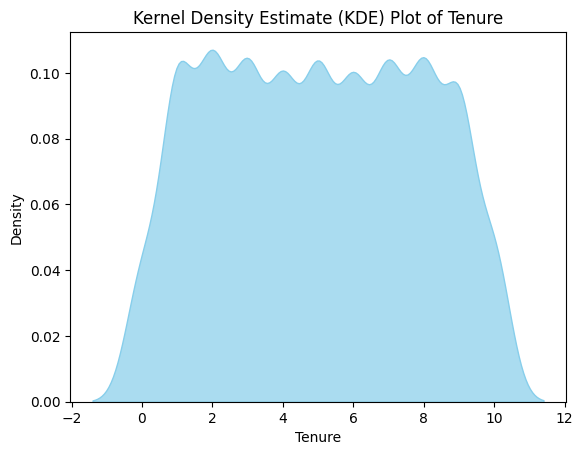

In [ ]:
# Draw the KDE plot for "Tenure"
sns.kdeplot(churn['Tenure'], fill=True, color='skyblue', alpha=0.7)

# Set the title and labels
plt.title('Kernel Density Estimate (KDE) Plot of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Density')

# Show the plot
plt.show()

**Explanation for using MEAN**
- According to our KDE plot the tenure column has close to normal distribution so we can preferably choose the mean method for filling the missing values.
- We simply cannot remove these rows as it represent the significant percentage of data.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, makes sense!

</div>

In [ ]:
# Replace missing values in "Tenure" with the mean
churn['Tenure'].fillna(churn['Tenure'].mean(), inplace=True)

# Check if there are still any missing values
churn.isnull().sum()

CustomerId           0
Surname              0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Gender_Male          0
Geography_Germany    0
Geography_Spain      0
dtype: int64



---



**Change data types into "int"**

It is preferable step because our ML algorithums work faster for int data as compared to float.

In [ ]:
#change the Tenure,Balance,Gender_Male,Geography_Germany,Geography_Spainand,and EstimatedSalary datatype from float and unit8 into integer
churn['Tenure'] = churn['Tenure'].astype(int)
churn['Balance'] = round(churn['Balance']).astype(int)
churn['EstimatedSalary'] = round(churn['EstimatedSalary']).astype(int)
churn['Gender_Male'] = churn['Gender_Male'].astype(int)
churn['Geography_Germany'] = churn['Geography_Germany'].astype(int)
churn['Geography_Spain'] = churn['Geography_Spain'].astype(int)

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerId         10000 non-null  int64 
 1   Surname            10000 non-null  object
 2   CreditScore        10000 non-null  int64 
 3   Age                10000 non-null  int64 
 4   Tenure             10000 non-null  int64 
 5   Balance            10000 non-null  int64 
 6   NumOfProducts      10000 non-null  int64 
 7   HasCrCard          10000 non-null  int64 
 8   IsActiveMember     10000 non-null  int64 
 9   EstimatedSalary    10000 non-null  int64 
 10  Exited             10000 non-null  int64 
 11  Gender_Male        10000 non-null  int64 
 12  Geography_Germany  10000 non-null  int64 
 13  Geography_Spain    10000 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


In [ ]:
churn.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,42,2,0,1,1,1,101349,1,0,0,0
1,15647311,Hill,608,41,1,83808,1,0,1,112543,0,0,0,1
2,15619304,Onio,502,42,8,159661,3,1,0,113932,1,0,0,0
3,15701354,Boni,699,39,1,0,2,0,0,93827,0,0,0,0
4,15737888,Mitchell,850,43,2,125511,1,1,1,79084,0,0,0,1




---



**Checking duplicated values**
- There are no duplicated value for the complete data frame.

In [ ]:
# Assuming your DataFrame is named "churn"
duplicated_rows = churn[churn.duplicated()]

# Display the duplicated rows, if any
print(duplicated_rows)

Empty DataFrame
Columns: [CustomerId, Surname, CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Gender_Male, Geography_Germany, Geography_Spain]
Index: []


**Removing unnecessary columns**

"CustomerId" and "Surname" columns do not have any meaningful impact on the target column (e.g., "Exited" indicating customer churn), and they are not providing valuable information for our machine learning model, so we can consider dropping these columns. Dropping unnecessary columns can help simplify the model, reduce computational requirements, and potentially improve the model's performance by removing irrelevant features.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good!

</div>

In [ ]:
churn = churn.drop(['CustomerId', 'Surname'], axis=1)
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101349,1,0,0,0
1,608,41,1,83808,1,0,1,112543,0,0,0,1
2,502,42,8,159661,3,1,0,113932,1,0,0,0
3,699,39,1,0,2,0,0,93827,0,0,0,0
4,850,43,2,125511,1,1,1,79084,0,0,0,1




---



<div class="alert alert-success">
<b>Reviewer's comment</b>

Good job on data preprocessing!

</div>

**Examine the balance of classes**

- There is a significant imbalance in the two classes as the customers who exited are very low as compared to the ones who does not exited the bank.

In [ ]:
class_counts = churn['Exited'].value_counts()
print(class_counts)

0    7963
1    2037
Name: Exited, dtype: int64


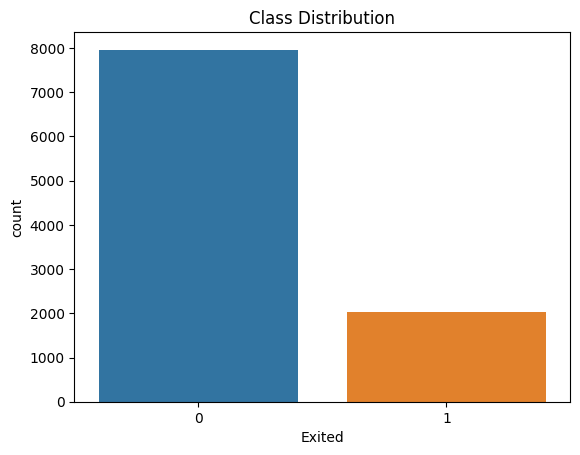

In [ ]:
sns.countplot(x='Exited', data=churn)
plt.title('Class Distribution')
plt.show()

In [ ]:
# Calculating imbalance ratio
minority_class = churn['Exited'].value_counts().min()
majority_class = churn['Exited'].value_counts().max()
imbalance_ratio = minority_class / majority_class
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 0.25580811252040686


<div class="alert alert-success">
<b>Reviewer's comment</b>

Class balance was examined!

</div>



---



---



#Data Preparation For Machine Learning




---



---



## splitting data into features and target


In [ ]:
# Features (X) are all columns except "Exited"
X = churn.drop('Exited', axis=1)
# Target variable (y) is "Exited"
y = churn['Exited']

## spliting data into training and test set


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and test sets

</div>

## Scaling

In [ ]:
# List of classifiers with pipelines
classifiers = [
    make_pipeline(StandardScaler(), LogisticRegression()),
    make_pipeline(StandardScaler(), SVC()),
    make_pipeline(StandardScaler(), KNeighborsClassifier()),
    make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    make_pipeline(StandardScaler(), BaggingClassifier()),
    make_pipeline(StandardScaler(), RandomForestClassifier()),
    make_pipeline(StandardScaler(), AdaBoostClassifier()),
    make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    make_pipeline(StandardScaler(), GaussianNB()),
    make_pipeline(StandardScaler(), XGBClassifier())
]

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Scaling was applied correctly for the case when you just train a single model using the train set and evaluate it on the test set, but for cross-validation it should really be applied in each fold separately, e.g. using [pipelines](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)    NEED TO FIX

</div>

**Corrected**: Now the scaling is applied to each fold separately for cross-validation using pipeline.

#Applying cross validation of 5 folds with all the models with default parameters for best model selection (Without considering Class imbalance)

In [ ]:
# Create a function to calculate F1 score using cross-validation
def calculate_f1_score(classifier, X_train, y_train):
    f1_scorer = make_scorer(f1_score)
    f1_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring=f1_scorer)
    return f1_scores.mean()

# Calculate F1 scores for each classifier
f1_scores = []

for classifier in classifiers:
    f1 = calculate_f1_score(classifier, X_train, y_train)
    f1_scores.append((classifier.steps[-1][0], f1))

# Display F1 scores
for classifier_name, f1 in f1_scores:
    print(f"{classifier_name}: F1 Score = {f1}")

logisticregression: F1 Score = 0.3208996503248368
svc: F1 Score = 0.5159223435407002
kneighborsclassifier: F1 Score = 0.4592937410279557
decisiontreeclassifier: F1 Score = 0.4878607714793749
baggingclassifier: F1 Score = 0.5534383525632899
randomforestclassifier: F1 Score = 0.578437042062213
adaboostclassifier: F1 Score = 0.5650473339484516
gradientboostingclassifier: F1 Score = 0.5853624626359124
gaussiannb: F1 Score = 0.44152101756520634
xgbclassifier: F1 Score = 0.57554307650228


**Achieving a high F1 score in the presence of imbalanced classes can be challenging!.**

Achieving a high F1 score in the presence of imbalanced classes poses a challenge due to the inherent bias towards the majority class. In imbalanced scenarios, where one class significantly outnumbers the other, models tend to prioritize accuracy by predicting the majority class more frequently as in our case 0. As a result, the model may exhibit high precision for the majority class while struggling to correctly identify instances of the minority classi.e 1, leading to lower recall. The F1 score, being the harmonic mean of precision and recall, is sensitive to these imbalances, making it challenging to simultaneously optimize both aspects. Striking a balance between minimizing false negatives for the minority class and maintaining high precision for the majority class becomes intricate, requiring thoughtful consideration of evaluation strategies, such as adjusting thresholds, utilizing different metrics, or employing specialized techniques for handling imbalanced datasets.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you trained a few models without taking the imbalance into account first

</div>



---



---



#Two approaches to fixing class imbalance



---



---



**1.Oversampling the Minority Class:**

This involves increasing the number of instances in the minority class. This can be done by duplicating existing instances or generating synthetic samples using techniques like SMOTE (Synthetic Minority Over-sampling Technique). Oversampling helps the model better learn the patterns in the minority class.

In [ ]:
# Instantiate the SMOTE class
smote = SMOTE(random_state=42)

# List of classifiers with imblearn pipelines
classifiers = [
    make_imb_pipeline(StandardScaler(), smote, LogisticRegression()),
    make_imb_pipeline(StandardScaler(), smote, SVC()),
    make_imb_pipeline(StandardScaler(), smote, KNeighborsClassifier()),
    make_imb_pipeline(StandardScaler(), smote, DecisionTreeClassifier()),
    make_imb_pipeline(StandardScaler(), smote, BaggingClassifier()),
    make_imb_pipeline(StandardScaler(), smote, RandomForestClassifier()),
    make_imb_pipeline(StandardScaler(), smote, AdaBoostClassifier()),
    make_imb_pipeline(StandardScaler(), smote, GradientBoostingClassifier()),
    make_imb_pipeline(StandardScaler(), smote, GaussianNB()),
    make_imb_pipeline(StandardScaler(), smote, XGBClassifier())
]

- New rows are generated synthetically for oversampling the minority class to significantly reduced the class imbalance in our target variable.

In [ ]:
# Create a function to calculate F1 score using cross-validation
def calculate_f1_score(classifier, X_train, y_train):
    f1_scorer = make_scorer(f1_score)
    f1_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring=f1_scorer)
    return f1_scores.mean()

# Calculate F1 scores for each classifier
f1_scores = []

for classifier in classifiers:
    f1 = calculate_f1_score(classifier, X_train, y_train)
    f1_scores.append((classifier.steps[-1][0], f1))

# Display F1 scores
for classifier_name, f1 in f1_scores:
    print(f"{classifier_name}: F1 Score = {f1}")

logisticregression: F1 Score = 0.49147843892044535
svc: F1 Score = 0.5849540339206036
kneighborsclassifier: F1 Score = 0.5040098471926773
decisiontreeclassifier: F1 Score = 0.49962818901890377
baggingclassifier: F1 Score = 0.5613349268143404
randomforestclassifier: F1 Score = 0.6081682808335669
adaboostclassifier: F1 Score = 0.5875097681631388
gradientboostingclassifier: F1 Score = 0.6215248158787351
gaussiannb: F1 Score = 0.5147798905549678
xgbclassifier: F1 Score = 0.5958511786717156


<div class="alert alert-danger">
<b>Reviewer's comment</b>

Strictly speaking if you want to combine resampling and cross-validation, resampling should be applied in each fold separately, not to the whole dataset used for cross-validation. Otherwise you will get overly optimistic cross-validation results due to data leakage. You can try splitting off a validation set from the train set before resampling and comparing the results on this validation set (but really, there's no need to even do that, you can see the test set score is much lower than the cross-validation score).

    
The simplest way to correctly apply resampling in cross-validation is using [imblearn pipelines](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html#imblearn.pipeline.Pipeline). You can also put scaling as a step in this pipeline.             NEED TO FIX

</div>

**Correction**: Now I correctly apply the resampling in cross-validation by using imblearn pipelines. Now we can see that the F1 scores are close to what we have seen for our test set because now there is no data leakage.



---



**2. Undersampling the Majority Class:**

This involves reducing the number of instances in the majority class. Undersampling helps prevent the model from being biased towards the majority class.

In [ ]:
# Instantiate the RandomUnderSampler class
undersampler = RandomUnderSampler(random_state=42)

# List of classifiers with imblearn pipelines for undersampling
classifiers = [
    make_imb_pipeline(StandardScaler(), undersampler, LogisticRegression()),
    make_imb_pipeline(StandardScaler(), undersampler, SVC()),
    make_imb_pipeline(StandardScaler(), undersampler, KNeighborsClassifier()),
    make_imb_pipeline(StandardScaler(), undersampler, DecisionTreeClassifier()),
    make_imb_pipeline(StandardScaler(), undersampler, BaggingClassifier()),
    make_imb_pipeline(StandardScaler(), undersampler, RandomForestClassifier()),
    make_imb_pipeline(StandardScaler(), undersampler, AdaBoostClassifier()),
    make_imb_pipeline(StandardScaler(), undersampler, GradientBoostingClassifier()),
    make_imb_pipeline(StandardScaler(), undersampler, GaussianNB()),
    make_imb_pipeline(StandardScaler(), undersampler, XGBClassifier())
]

In [ ]:
# Create a function to calculate F1 score using cross-validation
def calculate_f1_score(classifier, X_train, y_train):
    f1_scorer = make_scorer(f1_score)
    f1_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring=f1_scorer)
    return f1_scores.mean()

# Calculate F1 scores for each classifier
f1_scores = []

for classifier in classifiers:
    f1 = calculate_f1_score(classifier, X_train, y_train)
    f1_scores.append((classifier.steps[-1][0], f1))

# Display F1 scores
for classifier_name, f1 in f1_scores:
    print(f"{classifier_name}: F1 Score = {f1}")

logisticregression: F1 Score = 0.4950655040362828
svc: F1 Score = 0.5820267194188911
kneighborsclassifier: F1 Score = 0.5274264448167789
decisiontreeclassifier: F1 Score = 0.4894694795940426
baggingclassifier: F1 Score = 0.558353429978859
randomforestclassifier: F1 Score = 0.583879637774543
adaboostclassifier: F1 Score = 0.5768571613915499
gradientboostingclassifier: F1 Score = 0.5932365633204008
gaussiannb: F1 Score = 0.5075539938618856
xgbclassifier: F1 Score = 0.5600396061256283


**Conclusion**

- It is evident from the results that the **"Oversampling the Minority Class"** provide better F1 score as compared to other approach.
- From the results of Oversampling the Minority Class we can conclude that two best performing algorithums are **Random forest and GradientBoostingClassifier**.

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Same problem here

NEED TO FIX
</div>

**Corrected** : It is fixed now



---



# Applying RandomizedSearchCV to tune for the best hyper-parameters for model selection


##1. RandomForestClassifier hyper-parameters tuning

In [ ]:
# Instantiate the SMOTE class
smote = SMOTE(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'randomforestclassifier__n_estimators': randint(50, 100),
    'randomforestclassifier__max_features': ['auto', 'sqrt', None],
    'randomforestclassifier__max_depth': randint(5, 10),
    'randomforestclassifier__min_samples_split': randint(5, 10),
    'randomforestclassifier__min_samples_leaf': randint(1, 5),
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__class_weight': ['balanced', None]
}

# Instantiate the RandomForestClassifier
rfr = RandomForestClassifier(random_state=42)

# Create an imbalanced-learn pipeline with SMOTE
pipeline = make_imb_pipeline(StandardScaler(), smote, rfr)

# Create a RandomizedSearchCV object with imbalanced-learn pipeline
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=20, scoring='f1', cv=5, random_state=42)

# Fit the model on the resampled data
random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:")
print(random_search.best_params_)

# Display the best F1 score
print("Best F1 Score:", random_search.best_score_)

Best Hyperparameters:
{'randomforestclassifier__bootstrap': True, 'randomforestclassifier__class_weight': None, 'randomforestclassifier__max_depth': 9, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__min_samples_split': 9, 'randomforestclassifier__n_estimators': 73}
Best F1 Score: 0.6080892952440451


##GradientBoostingClassifier  hyper-parameters tuning

In [ ]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'gradientboostingclassifier__n_estimators': randint(50, 150),
    'gradientboostingclassifier__learning_rate': uniform(0.01, 0.1),
    'gradientboostingclassifier__max_depth': randint(3, 10),
    'gradientboostingclassifier__min_samples_split': randint(2, 20),
    'gradientboostingclassifier__min_samples_leaf': randint(1, 20),
    'gradientboostingclassifier__subsample': uniform(0.5, 0.9),
    'gradientboostingclassifier__max_features': ['auto', 'sqrt', 'log2', None],
    'gradientboostingclassifier__random_state': [42]
}

# Instantiate the GradientBoostingClassifier
gbr = GradientBoostingClassifier(random_state=42)

# Create an imbalanced-learn pipeline with SMOTE
pipeline_gbr = make_imb_pipeline(SMOTE(random_state=42), gbr)

# Create a RandomizedSearchCV object with imbalanced-learn pipeline
random_search_gbr = RandomizedSearchCV(pipeline_gbr, param_distributions=param_dist, n_iter=20, scoring='f1', cv=5, random_state=42)

# Fit the model on resampled data
random_search_gbr.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:")
print(random_search_gbr.best_params_)

# Display the best F1 score
print("Best F1 Score:", random_search_gbr.best_score_)

Best Hyperparameters:
{'gradientboostingclassifier__learning_rate': 0.1026300878513349, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__max_features': 'auto', 'gradientboostingclassifier__min_samples_leaf': 7, 'gradientboostingclassifier__min_samples_split': 10, 'gradientboostingclassifier__n_estimators': 121, 'gradientboostingclassifier__random_state': 42, 'gradientboostingclassifier__subsample': 0.9045056067243831}
Best F1 Score: 0.5941800785333623


##XGBClassifier  hyper-parameters tuning

In [ ]:
# Define the parameter distribution for RandomizedSearchCV
param_dist_xgb = {
    'xgbclassifier__n_estimators': randint(50, 150),
    'xgbclassifier__learning_rate': uniform(0.01, 0.1),
    'xgbclassifier__max_depth': randint(3, 10),
    'xgbclassifier__min_child_weight': randint(1, 5),
    'xgbclassifier__subsample': uniform(0.5, 0.9),
    'xgbclassifier__colsample_bytree': uniform(0.5, 0.9),
    'xgbclassifier__gamma': uniform(0, 0.2),
    'xgbclassifier__scale_pos_weight': [1, 10, 25, 50]
}
xg = XGBClassifier(random_state=42)

random_search_xgb = RandomizedSearchCV(xg, param_distributions=param_dist_xgb, n_iter=20, scoring='f1', cv=5, random_state=42)

# Fit the model on resampled data
random_search_xgb.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters (XGBClassifier):")
print(random_search_xgb.best_params_)

# Display the best F1 score
print("Best F1 Score (XGBClassifier):", random_search_xgb.best_score_)

Best Hyperparameters (XGBClassifier):
{'xgbclassifier__colsample_bytree': 0.8370861069626263, 'xgbclassifier__gamma': 0.19014286128198324, 'xgbclassifier__learning_rate': 0.0831993941811405, 'xgbclassifier__max_depth': 7, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 132, 'xgbclassifier__scale_pos_weight': 25, 'xgbclassifier__subsample': 0.5522752509513795}
Best F1 Score (XGBClassifier): 0.57554307650228


**CONCLUSION**
- As a result of hyper-parameters tuning of the models **(Random forest, GradientBoostingClassifier and XGB)** based on **oversampling of the minority class** we can conclude that the **Random forest Classifier performs better** so we are selecting this model to test the F1 score on our test data for our final model building

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Great, you did some hyperparameter tuning, but unfortunately it also suffers from data leakage due to resampling being applied to the whole train set.

NEED TO FIX
</div>

**Corrected** : Now we have used pipelines during hyper-parameters tuning and no data leakage occurs during resampling process.

# Final Testing (Random forest Classifier with best hyperparameters)

In [ ]:
# Best hyperparameters from RandomizedSearchCV
best_params_rf = {
    'bootstrap': True,
    'class_weight': None,
    'max_depth': 9,
    'max_features': 'sqrt',
    'min_samples_leaf': 3,
    'min_samples_split': 9,
    'n_estimators': 73
}

# Instantiate RandomForestClassifier with best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)

# Create an imbalanced-learn pipeline with SMOTE
pipeline = make_imb_pipeline(StandardScaler(), smote, best_rf_model)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the performance on the test set
f1_score_test = f1_score(y_test, y_pred)
print("F1 Score on Test Set:", f1_score_test)

F1 Score on Test Set: 0.608695652173913


<div class="alert alert-success">
<b>Reviewer's comment</b>

The final model was evaluated on the test set

</div>

# Measure the AUC-ROC metric and compare it with the F1.

In [ ]:
# List of classifiers and their corresponding best hyperparameters
classifiers = {
    'logisticregression': {'model': LogisticRegression(), 'params': {}},
    'svc': {'model': SVC(), 'params': {}},
    'kneighborsclassifier': {'model': KNeighborsClassifier(), 'params': {}},
    'decisiontreeclassifier': {'model': DecisionTreeClassifier(), 'params': {}},
    'baggingclassifier': {'model': BaggingClassifier(), 'params': {}},
    'randomforestclassifier': {'model': RandomForestClassifier(), 'params': {}},
    'adaboostclassifier': {'model': AdaBoostClassifier(), 'params': {}},
    'gradientboostingclassifier': {'model': GradientBoostingClassifier(), 'params': {}},
    'gaussiannb': {'model': GaussianNB(), 'params': {}},
    'xgbclassifier': {'model': XGBClassifier(), 'params': {}}
}

logisticregression:
  F1 Score = 0.5026833631484794
  AUC-ROC Score = 0.7818608473424948

svc:
  F1 Score = 0.5603190428713859
  AUC-ROC Score not available for this classifier.

kneighborsclassifier:
  F1 Score = 0.48632812499999994
  AUC-ROC Score = 0.7616194099922254

decisiontreeclassifier:
  F1 Score = 0.4779735682819383
  AUC-ROC Score = 0.683362072105024

baggingclassifier:
  F1 Score = 0.5633074935400516
  AUC-ROC Score = 0.8176908911552669

randomforestclassifier:
  F1 Score = 0.5810473815461347
  AUC-ROC Score = 0.8495014654398457

adaboostclassifier:
  F1 Score = 0.6002055498458375
  AUC-ROC Score = 0.8447480884362466

gradientboostingclassifier:
  F1 Score = 0.6408450704225352
  AUC-ROC Score = 0.8648755207417929

gaussiannb:
  F1 Score = 0.5055555555555555
  AUC-ROC Score = 0.8080139212826832

xgbclassifier:
  F1 Score = 0.6032171581769437
  AUC-ROC Score = 0.8477209283177447



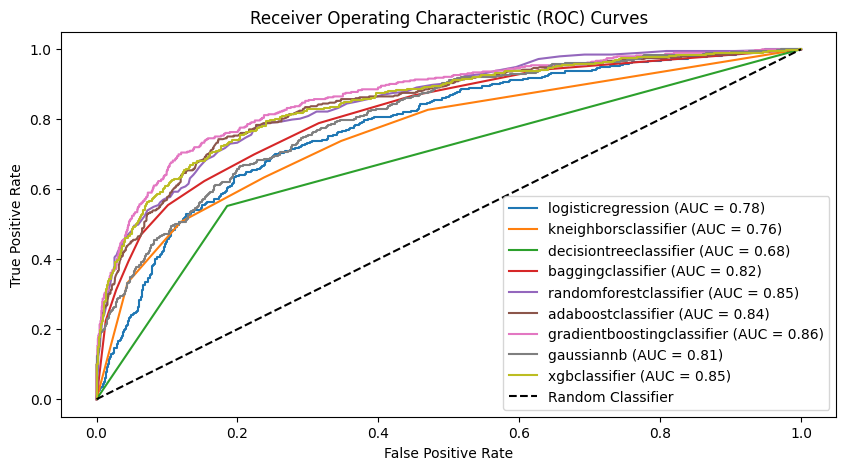

In [ ]:
# Create a subplot to display ROC curves
fig, ax = plt.subplots(figsize=(10, 5))

# Loop through each classifier
for clf_name, clf_data in classifiers.items():
    # Instantiate the classifier
    clf = clf_data['model']

    # Set balancing technique using SMOTE
    pipeline = make_imb_pipeline(StandardScaler(), smote, clf)

    # Fit the model on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Check if the classifier supports predict_proba
    if hasattr(clf, 'predict_proba'):
        # Calculate AUC-ROC
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
        auc_roc = roc_auc_score(y_test, y_pred_proba)

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        ax.plot(fpr, tpr, label=f'{clf_name} (AUC = {auc_roc:.2f})')

        print(f"{clf_name}:")
        print(f"  F1 Score = {f1}")
        print(f"  AUC-ROC Score = {auc_roc}")
    else:
        print(f"{clf_name}:")
        print(f"  F1 Score = {f1}")
        print("  AUC-ROC Score not available for this classifier.")

    print()

# Plot the diagonal line (random classifier)
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Please evaluate all models using ROC-AUC as well as F1 score. What the task meant was to compare how balancing techniques affected F1 score and ROC-AUC :)

NEED TO FIX

</div>

**Corrected**: The F1 scores and AUC-ROC scores have been calculated for all models, and AUC-ROC curves have been generated to facilitate a clearer and more accessible comparison between the different models.

#**CONCLUSION**

The behavior we're observing, where the AUC-ROC score is relatively high while the F1 score is moderate,It is not uncommon and can be explained by the characteristics of our data and the nature of the classification task.I will discuss these parameters one by one:

**AUC-ROC Score:**

- The AUC-ROC score measures the area under the Receiver Operating Characteristic (ROC) curve. It represents the model's ability to distinguish between the positive and negative classes across different threshold values.
- A high AUC-ROC score (close to 1) indicates good overall performance in terms of correctly ranking the probabilities of positive and negative instances.

**F1 Score:**

- The F1 score is the harmonic mean of precision and recall. It provides a balance between precision (the ability not to label as positive something that is negative) and recall (the ability to find all the positive instances).
- A F1 score of 0.59 is considered moderate. It suggests that the model achieves a reasonable trade-off between precision and recall but may not be optimizing one at the expense of the other..

**ROC curve:**

- The ROC curve visually represents the trade-off between sensitivity (true positive rate) and specificity (true negative rate) at various threshold values.
- The curve being far from the central diagonal line (random guessing) suggests that the model is performing well in distinguishing between the classes.


**In summary, while the model shows promise with a high AUC-ROC score, there is room for refinement, especially if maximizing the F1 score is a priority.**

<div class="alert alert-success">
<b>Reviewer's comment</b>

Conclusions look good

</div>